## KPIS
En este notebook realizaremos un previo al analisis de los KPIS para posteriormente trabajrlos en nuestro dashboar de PowerBI

# Primer KPI

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Segun la pagina oficial del gobierno argentino la poblacion de la ciudad de buenos aires es de 3'121707 habitantes 
Fuente : https://www.argentina.gob.ar/caba

In [2]:
# librerias a usar 
import numpy as np 
import pandas as pd

In [3]:
Habitantes_CABA = 3121707

In [4]:
# Dataframes
df_Hechos = pd.read_parquet('Data\Hechos_Homicidios_ETL.parquert')
df_Victimas = pd.read_parquet('Data\Victimas_Homicidios_ETL.parquert')

In [5]:
df_Hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Momento_del_dia
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Noche
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Noche
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,...,None,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Dia
3,2016-0004,1.0,1/10/2016,2016.0,1.0,10.0,0:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,Noche
4,2016-0005,1.0,1/21/2016,2016.0,1.0,21.0,5:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Noche


In [6]:
df_Victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,RangoEtario
0,2016-0001,1/1/2016,2016.0,1.0,1.0,CONDUCTOR,MOTO,MASCULINO,19.0,1/1/2016,19-30
1,2016-0002,1/2/2016,2016.0,1.0,2.0,CONDUCTOR,AUTO,MASCULINO,70.0,1/2/2016,51+
2,2016-0003,1/3/2016,2016.0,1.0,3.0,CONDUCTOR,MOTO,MASCULINO,30.0,1/3/2016,31-50
3,2016-0004,1/10/2016,2016.0,1.0,10.0,CONDUCTOR,MOTO,MASCULINO,18.0,SD,19-30
4,2016-0005,1/21/2016,2016.0,1.0,21.0,CONDUCTOR,MOTO,MASCULINO,29.0,2/1/2016,19-30


In [7]:
# Agrupamos por anio y por mes sumando el numero de victimas
df_agrupado = df_Victimas.groupby(['AAAA', 'MM'])['VICTIMA'].count().reset_index()
# Segunda agrupacion y creacion de las columnas del primer semestre y segundo semestre de cada anio
df_agrupado_2 = (
    df_agrupado.groupby("AAAA")
    .agg(
        primer_semestre=("VICTIMA", lambda x: x.iloc[:6].sum()),
        Segundo_semestre=("VICTIMA", lambda x: x.iloc[6:].sum()),
    )
    .reset_index()
)

df_agrupado_2


,AAAA,primer_semestre,Segundo_semestre
0,2016.0,65,80
1,2017.0,69,71
2,2018.0,70,79
3,2019.0,57,47
4,2020.0,31,50
5,2021.0,55,42


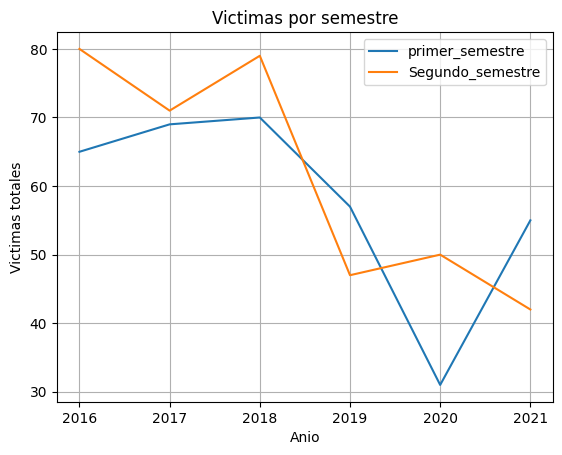

In [8]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df_grouped'
plt.plot(df_agrupado_2["AAAA"], df_agrupado_2["primer_semestre"], label="primer_semestre")
plt.plot(df_agrupado_2["AAAA"], df_agrupado_2["Segundo_semestre"], label="Segundo_semestre")

plt.xlabel("Anio")
plt.ylabel("Victimas totales")
plt.title("Victimas por semestre")
plt.legend()
plt.grid(True)
plt.show()


Ahora aplicaremos la formula de la tasa de siniestros viales para ver nuestro primer KPI

In [9]:
df_agrupado_2["Tasa_primer_semestre"] = df_agrupado_2['primer_semestre']*100000/Habitantes_CABA
df_agrupado_2["Tasa_segundo_semestre"] = df_agrupado_2['Segundo_semestre']*100000/Habitantes_CABA
df_agrupado_2


,AAAA,primer_semestre,Segundo_semestre,Tasa_primer_semestre,Tasa_segundo_semestre
0,2016.0,65,80,2.082194,2.562700
1,2017.0,69,71,2.210329,2.274397
2,2018.0,70,79,2.242363,2.530667
3,2019.0,57,47,1.825924,1.505587
4,2020.0,31,50,0.993046,1.601688
5,2021.0,55,42,1.761857,1.345418


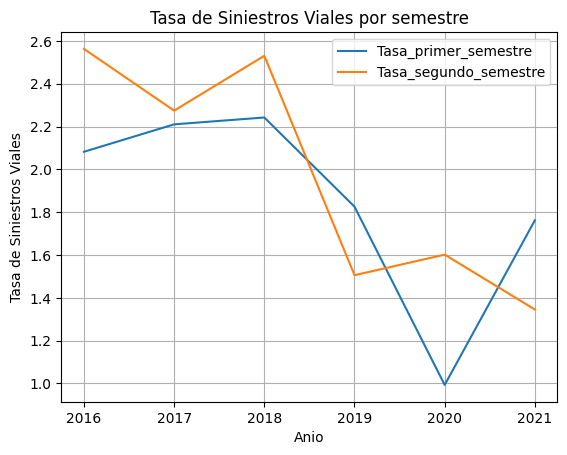

In [10]:
plt.plot(df_agrupado_2["AAAA"], df_agrupado_2["Tasa_primer_semestre"], label="Tasa_primer_semestre")
plt.plot(df_agrupado_2["AAAA"], df_agrupado_2["Tasa_segundo_semestre"], label="Tasa_segundo_semestre")

plt.xlabel("Anio")
plt.ylabel("Tasa de Siniestros Viales")
plt.title("Tasa de Siniestros Viales por semestre")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import pandas as pd

# Supongamos que df es tu DataFrame con las columnas 'AAAA', 'Tasa_primer_semestre', 'Tasa_segundo_semestre'

# Calcula la tasa ajustada del segundo semestre (reducción del 10%)
df_agrupado_2['Tasa_ajustada_segundo_semestre'] = 0.9 * df_agrupado_2['Tasa_segundo_semestre']

# Compara la tasa ajustada del segundo semestre con la tasa del primer semestre
df_agrupado_2['Reduccion'] = df_agrupado_2['Tasa_primer_semestre'] - df_agrupado_2['Tasa_ajustada_segundo_semestre']

# Muestra el DataFrame resultante
df_agrupado_2


,AAAA,primer_semestre,Segundo_semestre,Tasa_primer_semestre,Tasa_segundo_semestre,Tasa_ajustada_segundo_semestre,Reduccion
0,2016.0,65,80,2.082194,2.562700,2.306430,-0.224236
1,2017.0,69,71,2.210329,2.274397,2.046957,0.163372
2,2018.0,70,79,2.242363,2.530667,2.277600,-0.035237
3,2019.0,57,47,1.825924,1.505587,1.355028,0.470896
4,2020.0,31,50,0.993046,1.601688,1.441519,-0.448473
5,2021.0,55,42,1.761857,1.345418,1.210876,0.550981


     AAAA  primer_semestre  Segundo_semestre  Tasa_primer_semestre  \
0  2016.0               65                80              2.082194   
1  2017.0               69                71              2.210329   
2  2018.0               70                79              2.242363   
3  2019.0               57                47              1.825924   
4  2020.0               31                50              0.993046   
5  2021.0               55                42              1.761857   

   Tasa_segundo_semestre  Tasa_ajustada_segundo_semestre  Reduccion  \
0               2.562700                        2.306430  -0.224236   
1               2.274397                        2.046957   0.163372   
2               2.530667                        2.277600  -0.035237   
3               1.505587                        1.355028   0.470896   
4               1.601688                        1.441519  -0.448473   
5               1.345418                        1.210876   0.550981   

   Reduccio

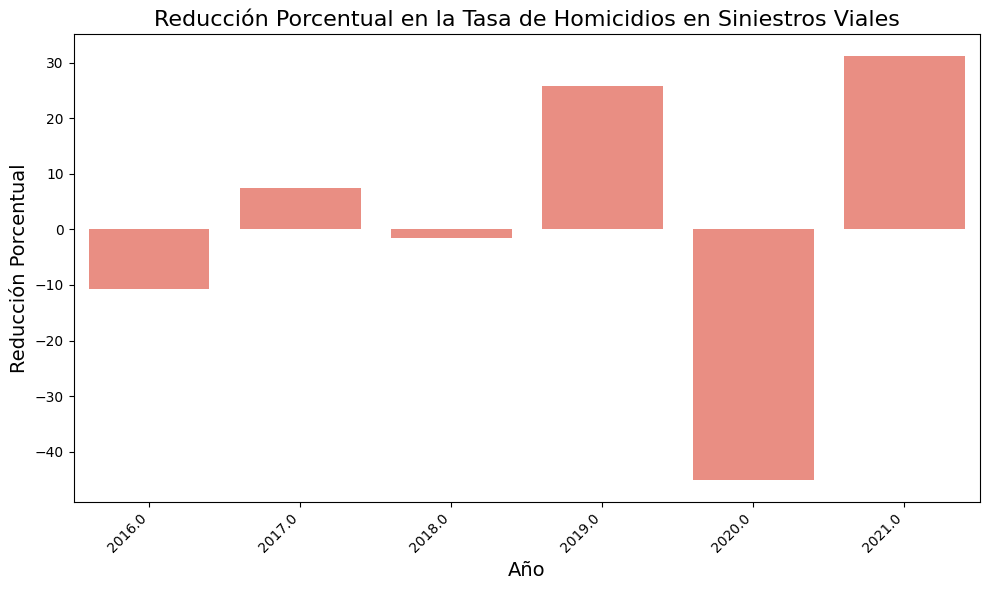

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df_agrupado_2 es tu DataFrame con las columnas 'AAAA', 'Tasa_primer_semestre', 'Tasa_segundo_semestre', 'Reduccion'

# Calcula la tasa ajustada del segundo semestre (reducción del 10%)
df_agrupado_2['Tasa_ajustada_segundo_semestre'] = 0.9 * df_agrupado_2['Tasa_segundo_semestre']

# Calcula la reducción en términos porcentuales
df_agrupado_2['Reduccion_porcentual'] = (df_agrupado_2['Reduccion'] / df_agrupado_2['Tasa_primer_semestre']) * 100


# Crea un gráfico de barras para visualizar la reducción porcentual
plt.figure(figsize=(10, 6))
sns.barplot(x='AAAA', y='Reduccion_porcentual', data=df_agrupado_2, color='salmon')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Reducción Porcentual', fontsize=14)
plt.title('Reducción Porcentual en la Tasa de Homicidios en Siniestros Viales', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


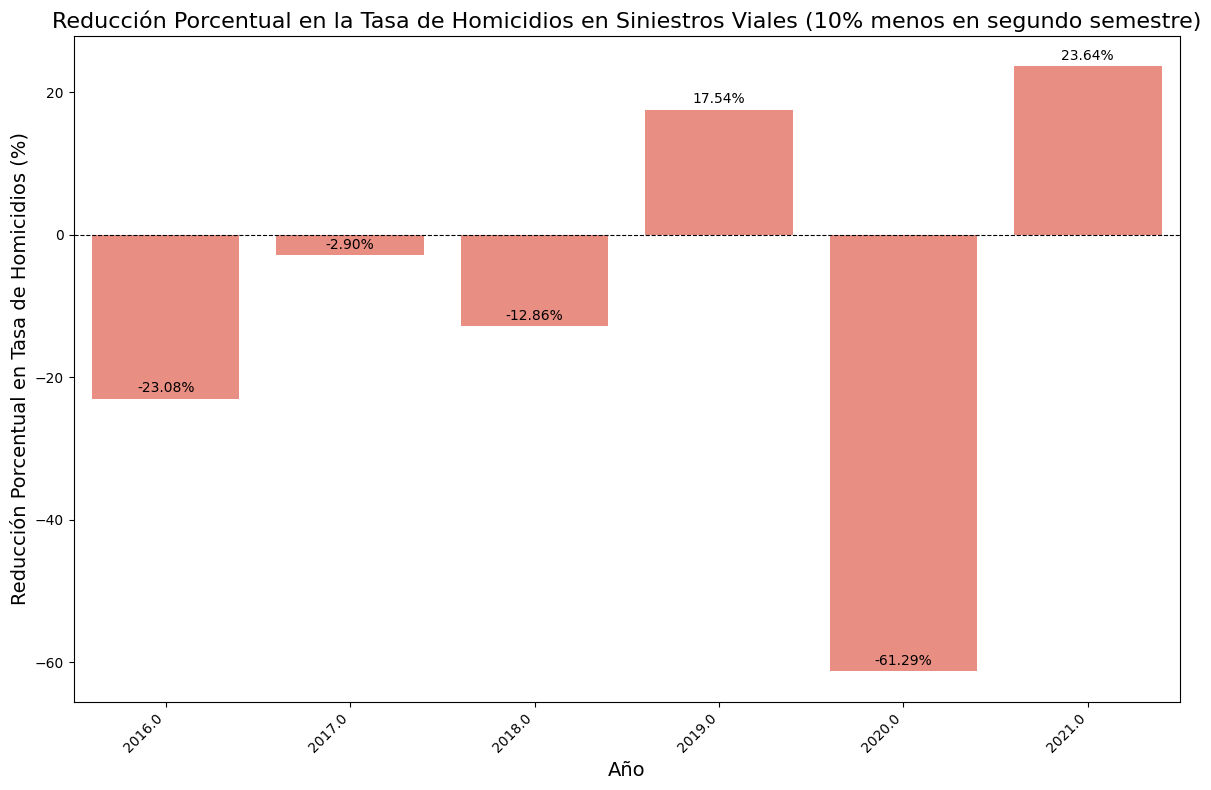

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df_agrupado_2 es tu DataFrame con las columnas 'AAAA', 'Tasa_primer_semestre', 'Tasa_segundo_semestre', 'Reduccion'

# Calcula la tasa ajustada del segundo semestre (reducción del 10%)

# Calcula la reducción en términos porcentuales
df_agrupado_2['Reduccion_porcentual'] = ((df_agrupado_2['Tasa_primer_semestre'] - df_agrupado_2['Tasa_segundo_semestre']) / df_agrupado_2['Tasa_primer_semestre']) * 100

# Crea un gráfico de barras para visualizar la reducción porcentual
plt.figure(figsize=(12, 8))
sns.barplot(x='AAAA', y='Reduccion_porcentual', data=df_agrupado_2, color='salmon')

# Añade etiquetas y título
plt.xlabel('Año', fontsize=14)
plt.ylabel('Reducción Porcentual en Tasa de Homicidios (%)', fontsize=14)
plt.title('Reducción Porcentual en la Tasa de Homicidios en Siniestros Viales (10% menos en segundo semestre)', fontsize=16)

# Añade etiquetas de porcentaje en las barras
for i, value in enumerate(df_agrupado_2['Reduccion_porcentual']):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Añade una línea base cero
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Segundo KPI

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [22]:
df_Hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Momento_del_dia
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Noche
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Noche
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,...,None,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Dia
3,2016-0004,1.0,1/10/2016,2016.0,1.0,10.0,0:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,Noche
4,2016-0005,1.0,1/21/2016,2016.0,1.0,21.0,5:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Noche


In [23]:
df_filtrado = pd.DataFrame(df_Hechos[df_Hechos['VICTIMA'] == "MOTO"])
columns_to_extract = ['AAAA', 'VICTIMA']
df_filtrado_1 = df_filtrado[columns_to_extract].copy()
df_filtrado_2 = df_filtrado_1.groupby('AAAA').count().reset_index()
df_filtrado_2

,AAAA,VICTIMA
0,2016.0,64
1,2017.0,53
2,2018.0,55
3,2019.0,50
4,2020.0,27
5,2021.0,46


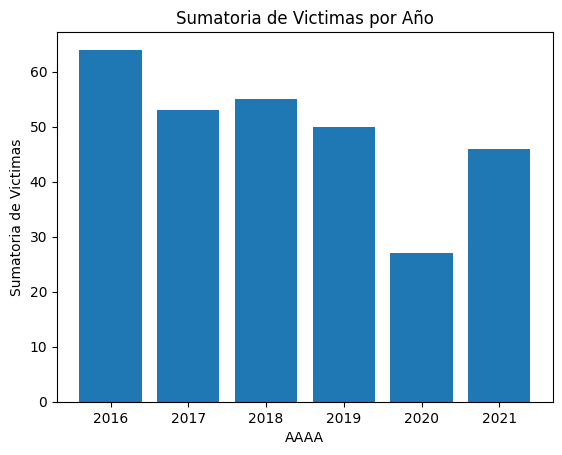

In [24]:
# Plot the data using a bar plot
plt.bar(df_filtrado_2['AAAA'], df_filtrado_2['VICTIMA'])
plt.xlabel('AAAA')
plt.ylabel('Sumatoria de Victimas')
plt.title('Sumatoria de Victimas por Año')
plt.show()

In [25]:
import pandas as pd

# Supongamos que df_Hechos es tu DataFrame con la información de accidentes
# Asegúrate de que tengas columnas como 'AAAA', 'VICTIMA', etc.

# Filtra los datos para obtener solo los accidentes con víctimas en moto
df_motociclistas = df_Hechos[df_Hechos['VICTIMA'] == 'MOTO']

# Agrupa por año y cuenta los accidentes mortales con víctimas en moto
accidentes_por_ano = df_motociclistas.groupby('AAAA').COUNT()

# Calcula la variación porcentual
variacion_porcentual = (
    accidentes_por_ano.shift(1) - accidentes_por_ano
) / accidentes_por_ano.shift(1) * 100

# Muestra la variación porcentual
variacion_porcentual


AttributeError: 'DataFrameGroupBy' object has no attribute 'COUNT'

posx and posy should be finite values
posx and posy should be finite values


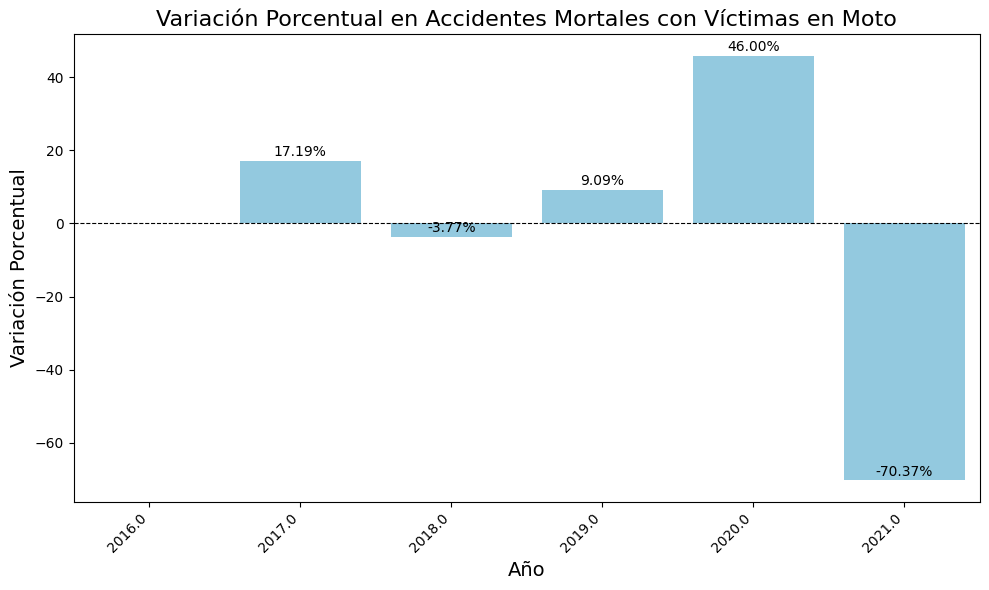

In [ ]:
# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=variacion_porcentual.index, y=variacion_porcentual, color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Año', fontsize=14)
plt.ylabel('Variación Porcentual', fontsize=14)
plt.title('Variación Porcentual en Accidentes Mortales con Víctimas en Moto', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Agregar porcentajes en las barras
for i, value in enumerate(variacion_porcentual):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

# Agregar línea base cero
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Como podemos ver la variacion en el ultimo anio fue muy inferior al 7% por lo que concluimos que no se esta cumpliendo el objetivo de nuestro KPI